<a href="https://colab.research.google.com/github/FatmaAkacha/MchineLearning/blob/main/Unsupervised_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instruction 1 :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/go_mycode/Credit_card_dataset.csv')  # replace with your actual file path

# Display the first few rows of the dataset
print(data.head())
# Display basic information about the dataset
print(data.info())
# Check for missing values
print(data.isnull().sum())
# Describe the dataset
print(data.describe())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 

# **Instruction 2:**

In [ ]:
# If there are missing values, we can decide to either drop them or fill them with appropriate values.
data.dropna(inplace=True)  # Drop rows with missing values for simplicity

# Re-check for missing values
print(data.isnull().sum())

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64


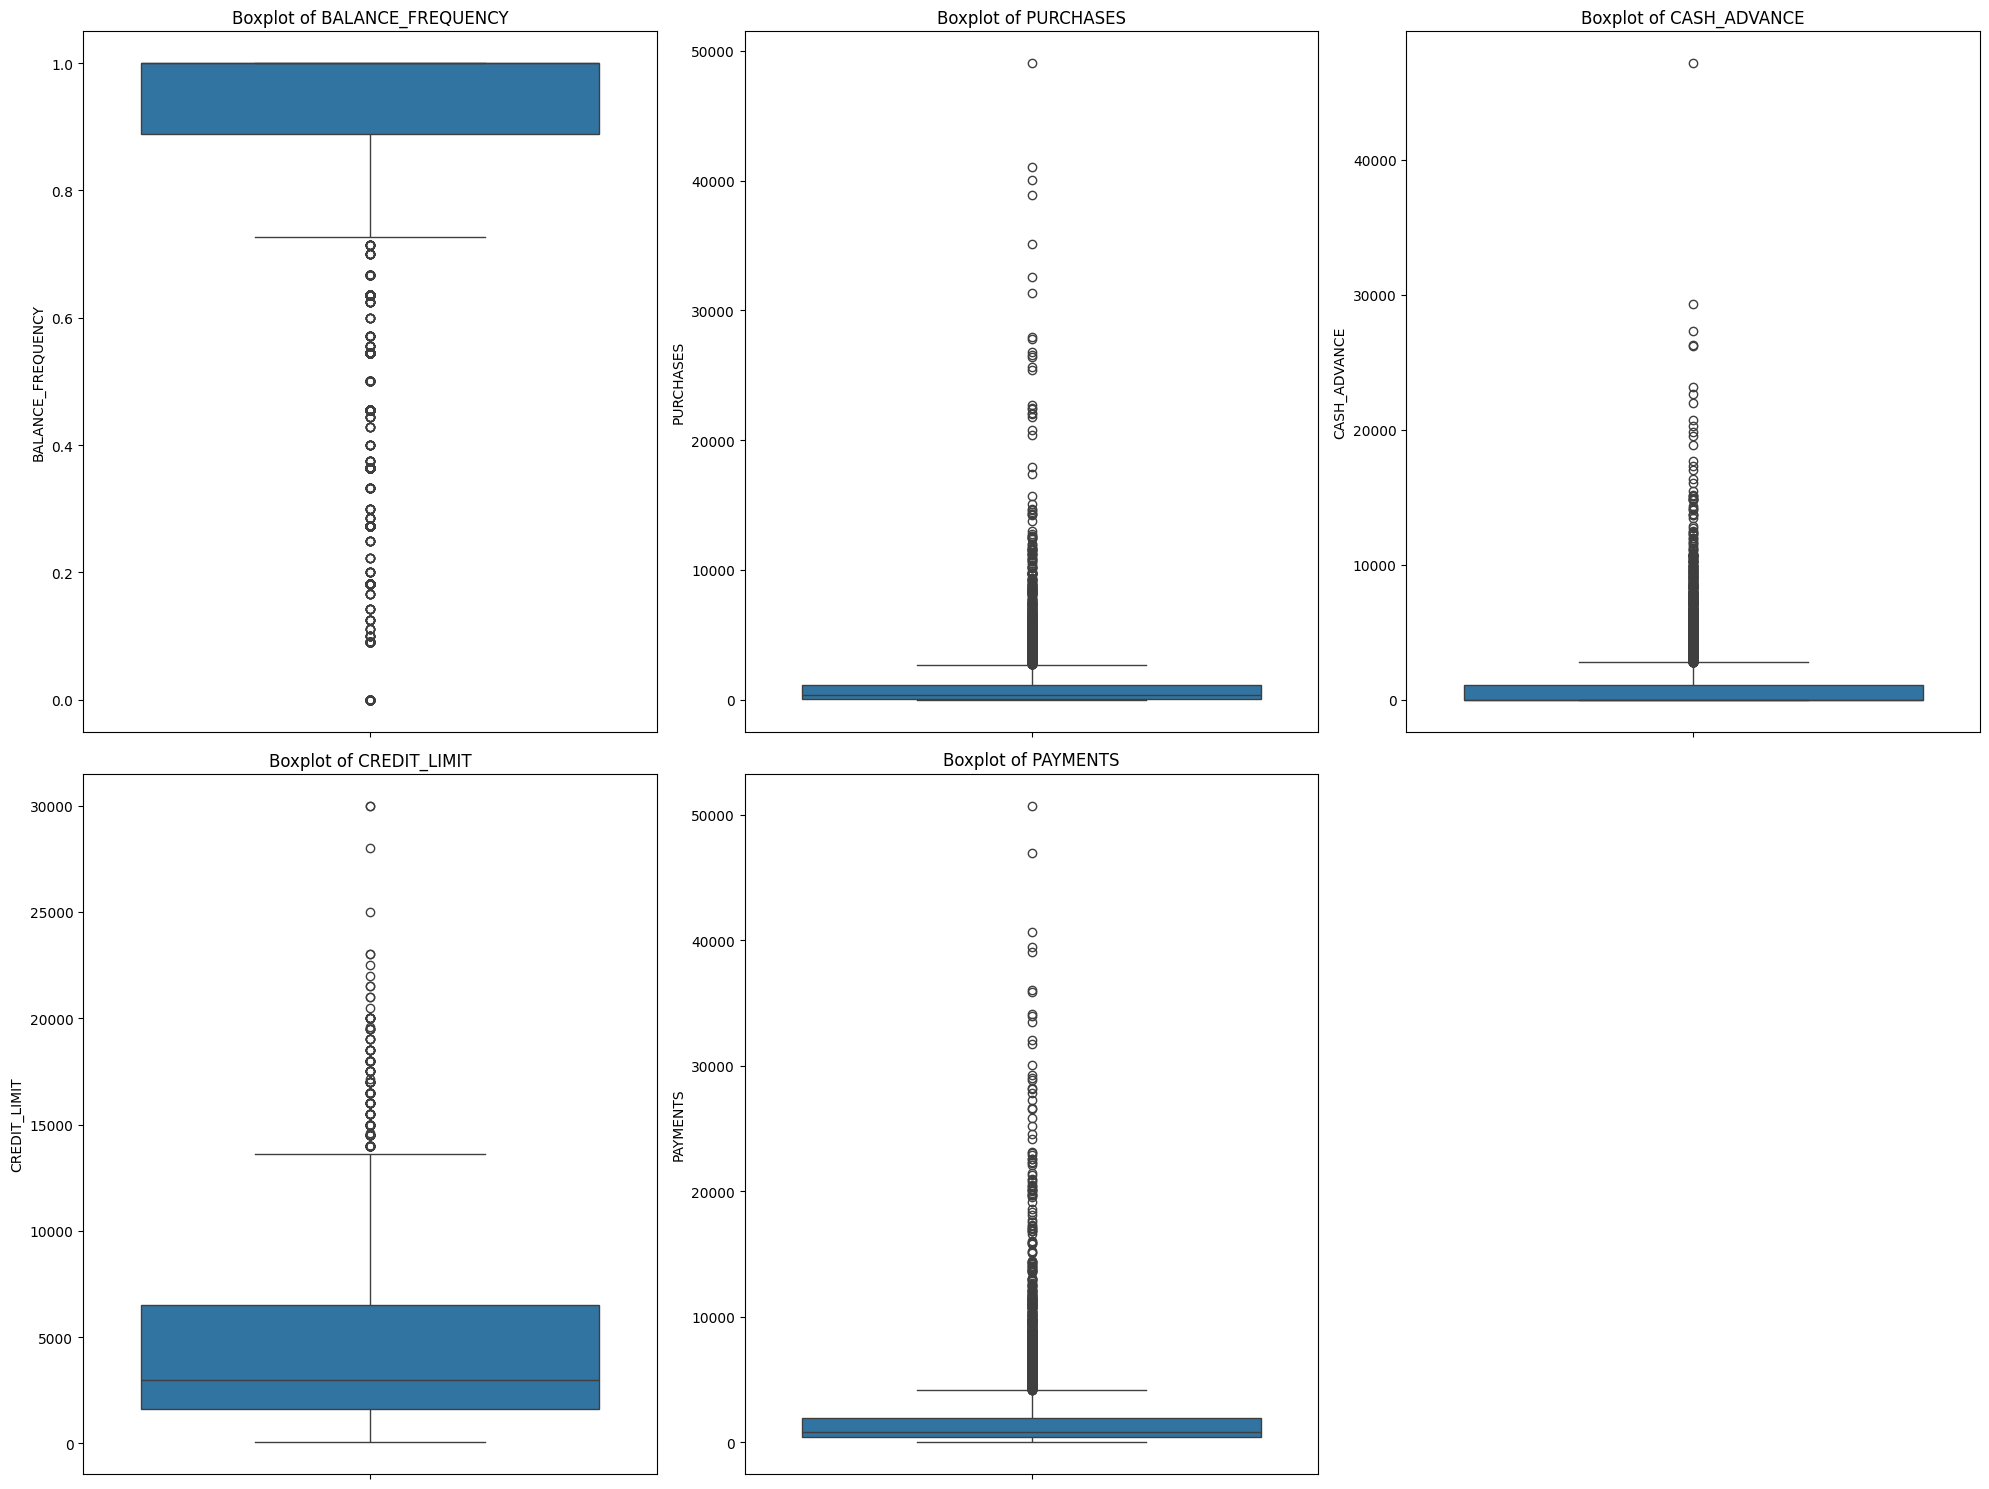

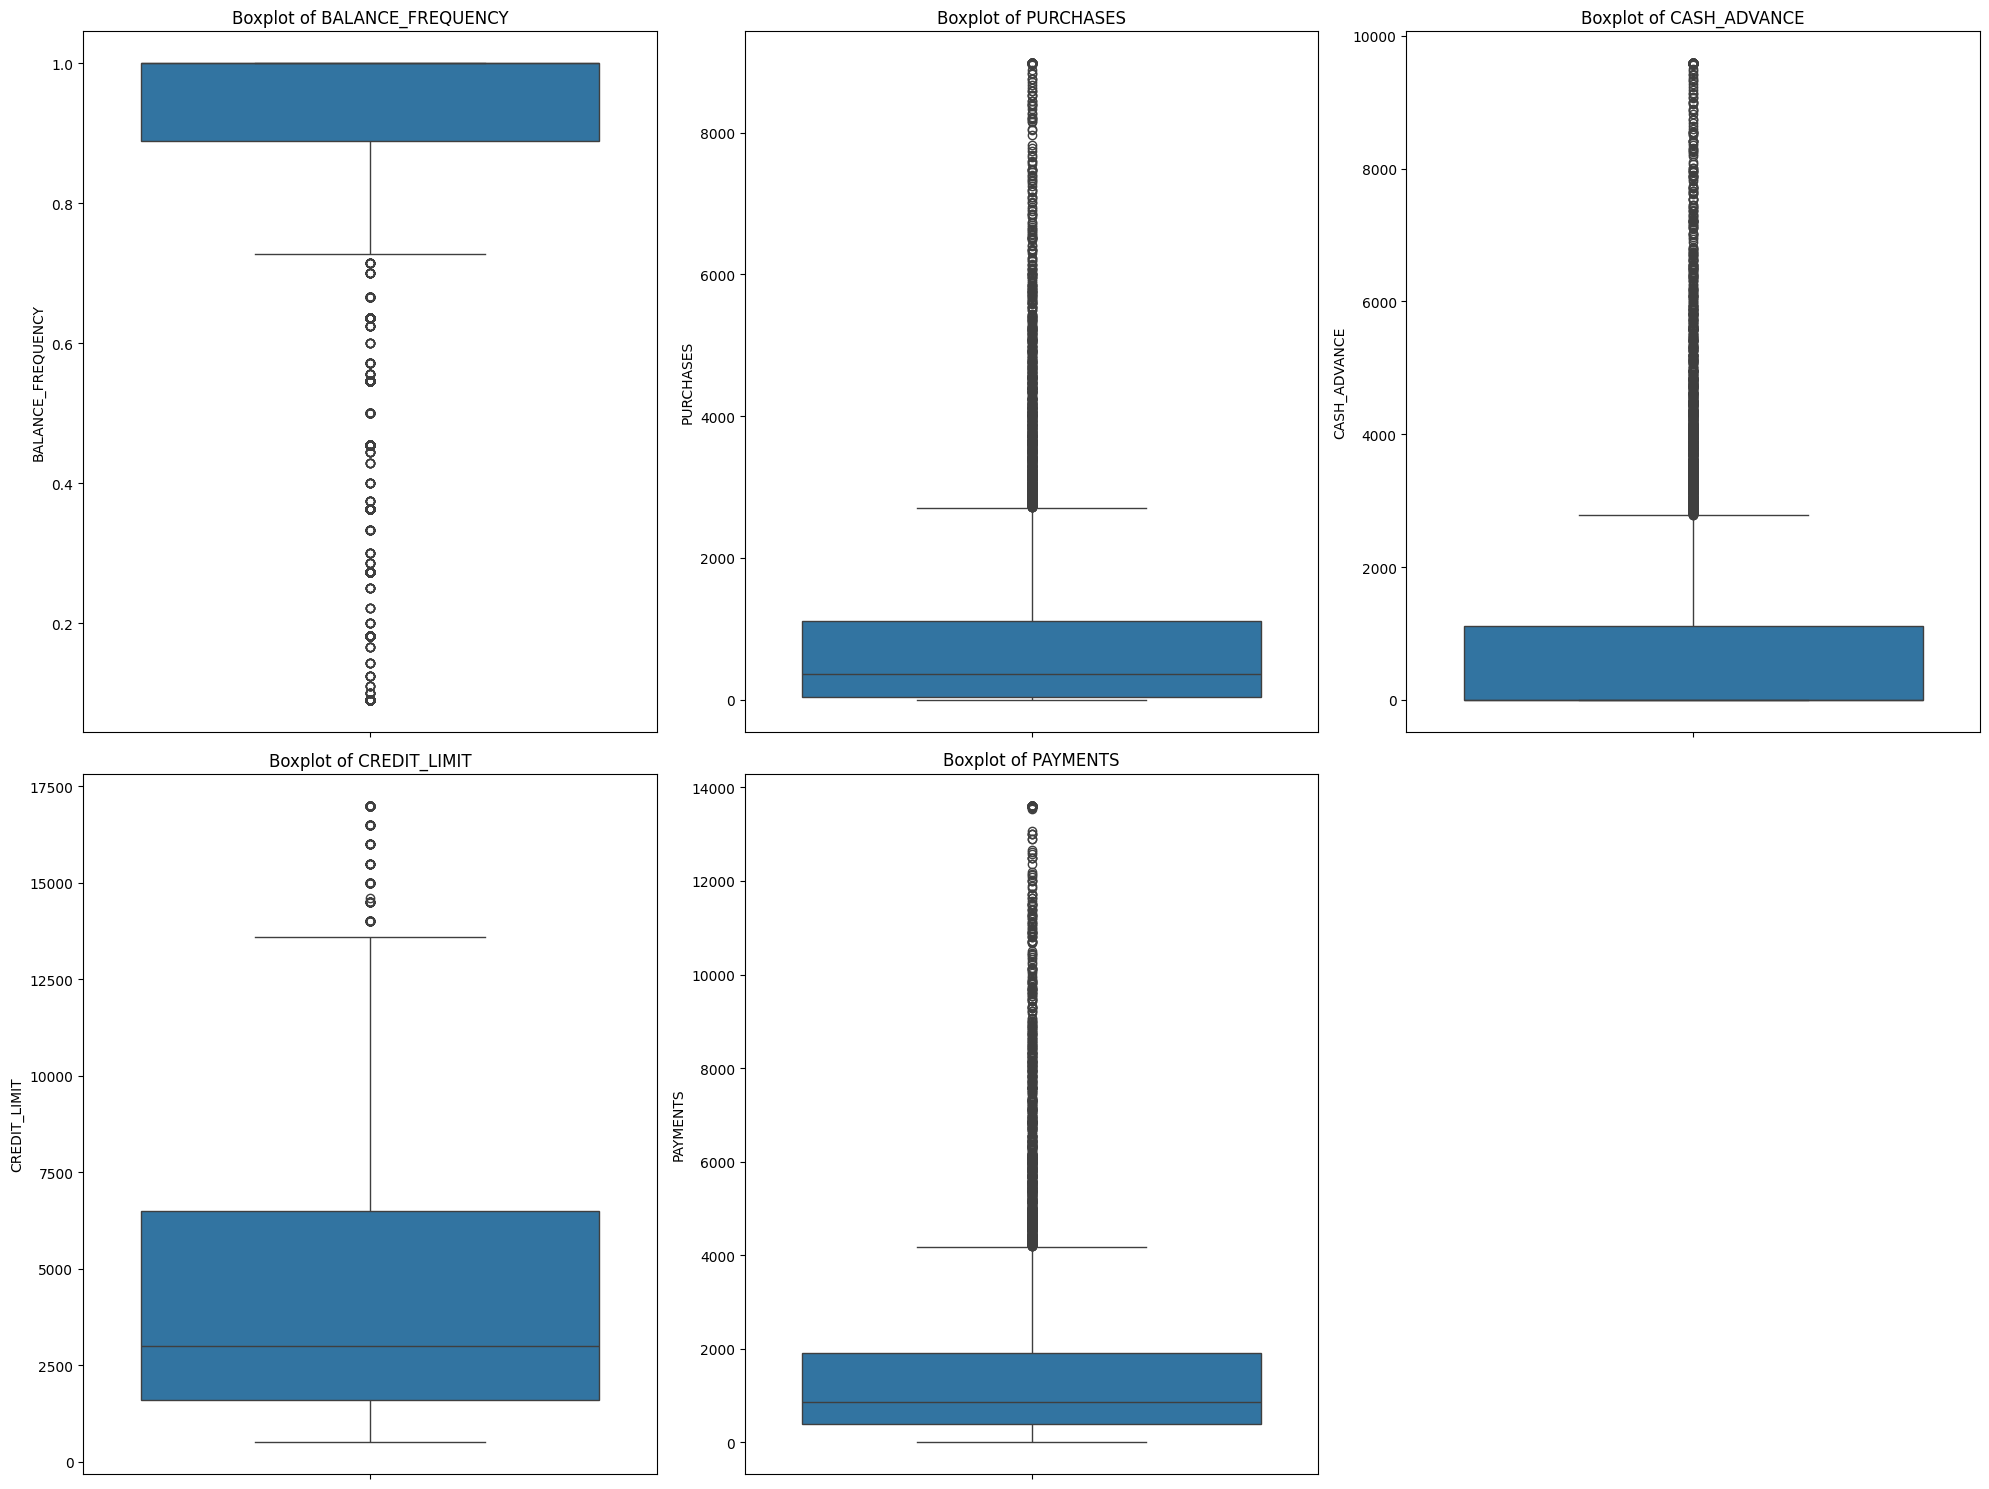

In [ ]:
# Plotting boxplots to check for outliers
features = ['BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Handling outliers can be complex, but one simple method is to cap them at a certain percentile
for feature in features:
    q_low = data[feature].quantile(0.01)
    q_high = data[feature].quantile(0.99)
    data[feature] = np.where(data[feature] < q_low, q_low, data[feature])
    data[feature] = np.where(data[feature] > q_high, q_high, data[feature])

# Replot the boxplots to check the changes
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# **Instruction 3 :**

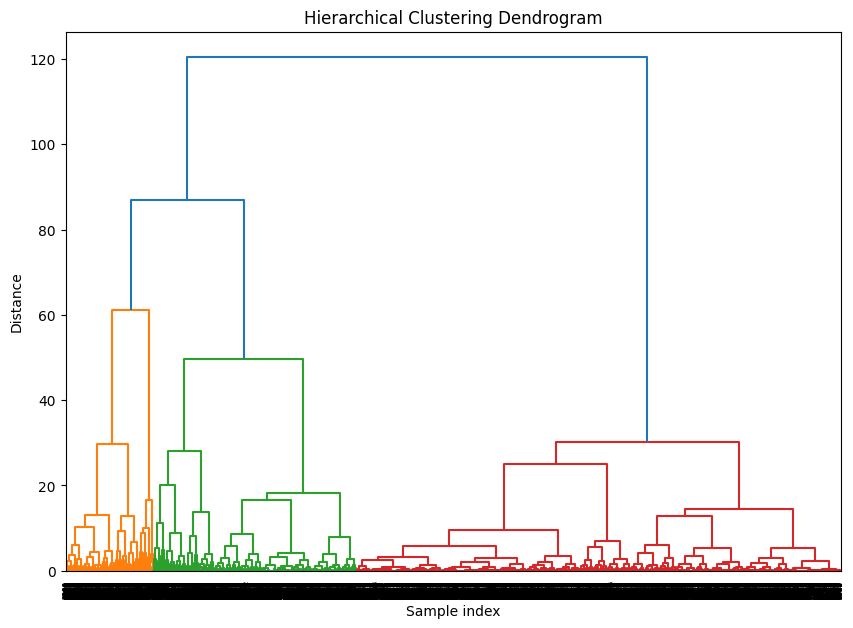

In [ ]:
# Selecting the two features for clustering
data_subset = data[['PURCHASES', 'CREDIT_LIMIT']]

# Scaling the subset data
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)

# Perform hierarchical clustering
linked = linkage(data_subset_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# **Instruction 4 :**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


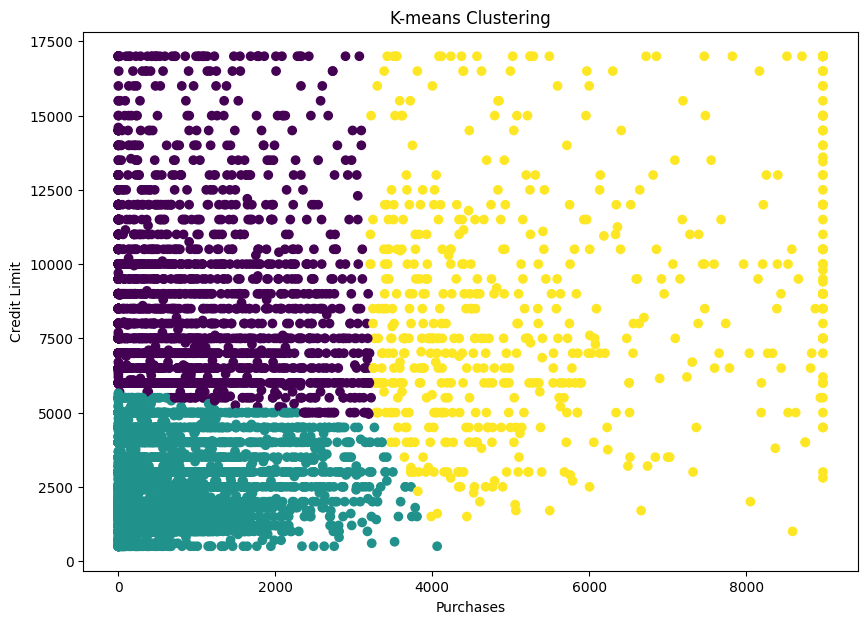

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # assuming we choose 3 clusters
kmeans.fit(data_subset_scaled)
data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data['PURCHASES'], data['CREDIT_LIMIT'], c=data['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.show()

# **Instruction 5 :**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

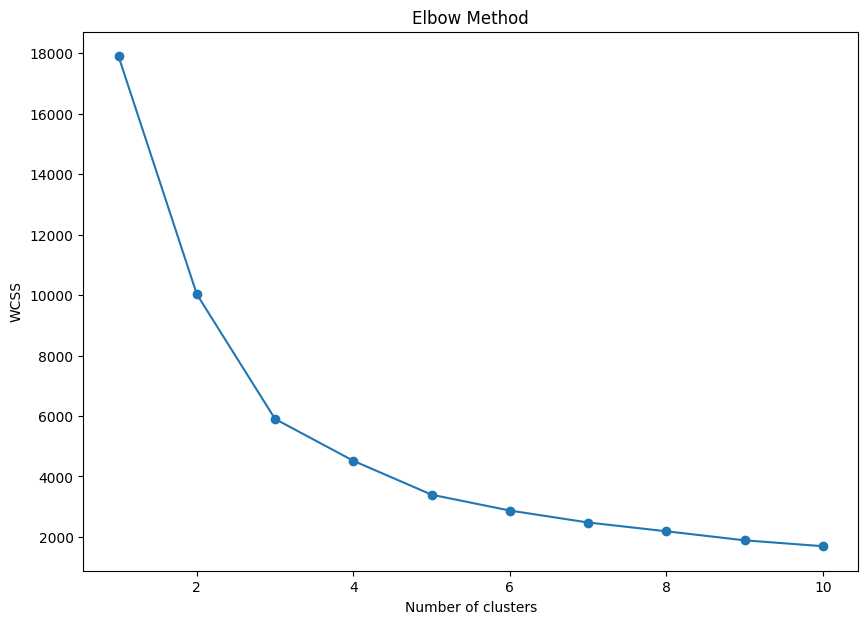

In [ ]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_subset_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Instruction 6 :**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


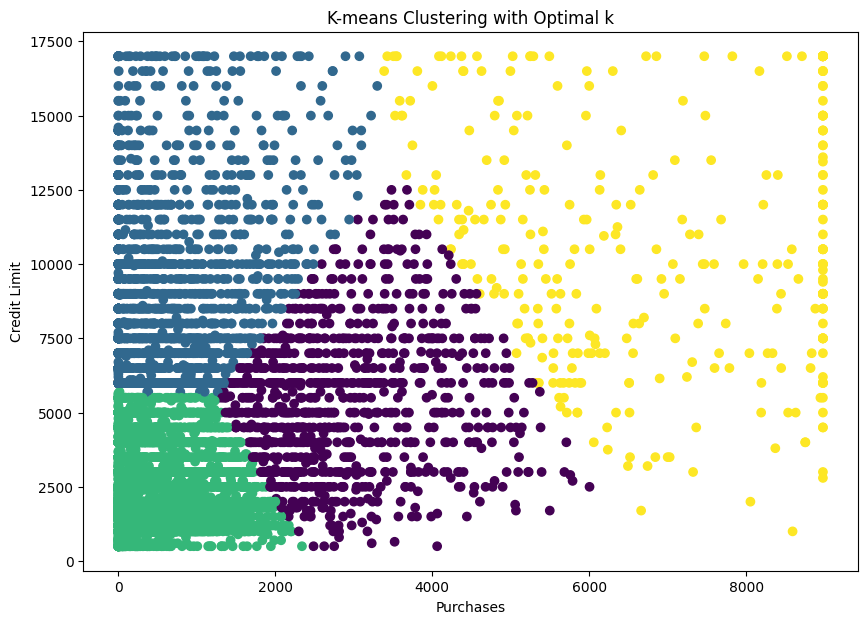

In [ ]:
# Assume the optimal number of clusters is 4 based on the elbow plot
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_subset_scaled)
data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(data['PURCHASES'], data['CREDIT_LIMIT'], c=data['Cluster'], cmap='viridis')
plt.title('K-means Clustering with Optimal k')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.show()